In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.colormaps["plasma"](np.linspace(0, 1, 256))

array([[0.050383, 0.029803, 0.527975, 1.      ],
       [0.063536, 0.028426, 0.533124, 1.      ],
       [0.075353, 0.027206, 0.538007, 1.      ],
       ...,
       [0.944152, 0.961916, 0.146861, 1.      ],
       [0.941896, 0.96859 , 0.140956, 1.      ],
       [0.940015, 0.975158, 0.131326, 1.      ]], shape=(256, 4))

In [2]:
from matplotlib.colors import ListedColormap
import numpy as np


/tmp/ipykernel_423824/3405611233.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([format_spec % val for val in ax.get_xticks()])


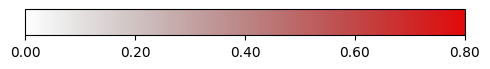

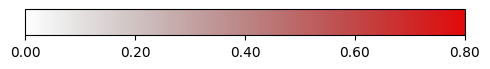

In [12]:
from matplotlib.colorbar import ColorbarBase


def create_colorbar(get_color, vmin=0, vmax=1, width=8, height=0.8, dpi=100, num_samples=256, 
                   title=None, format_spec="%.2f"):
    """
    创建自定义colorbar
    
    参数:
    get_color: 颜色映射函数，接受vmin-vmax之间的值，返回(r,g,b,a)颜色元组
    vmin: colorbar最小值
    vmax: colorbar最大值
    width: 图像宽度
    height: 图像高度
    dpi: 图像分辨率
    num_samples: 颜色采样数量
    title: colorbar标题
    format_spec: 刻度格式化字符串
    """
    # 创建图形
    fig, ax = plt.subplots(figsize=(width, height), dpi=dpi)
    
    # 生成颜色样本
    colors = []
    for i in range(num_samples):
        # 计算实际值
        value = vmin + (vmax - vmin) * (i / (num_samples - 1))
        r, g, b, a = get_color(value)
        colors.append((r, g, b, a))
    
    # 创建自定义colormap
    custom_cmap = ListedColormap(colors)
    
    # 直接创建colorbar
    ColorbarBase(ax, 
                cmap=custom_cmap,
                orientation='horizontal',
                norm=plt.Normalize(vmin, vmax))
    
    # 设置刻度数量和格式
    ax.locator_params(nbins=5)  # 设置大约5个刻度
    ax.set_xticklabels([format_spec % val for val in ax.get_xticks()])
    
    # 设置标题（如果提供）
    if title:
        ax.set_title(title)
    
    # 调整布局
    plt.tight_layout()
    
    return fig

def get_color(value):
    value = value *0.4
    if value == 0:
        return (0, 0, 0, 0)
    result = mpl.colormaps["hot"](value)
    _res = tuple([int(255 * x) for x in result])
    r, g, b, a = _res
    # return (r, g, b, a)
    return (result[0], result[1], result[2], value*3)

create_colorbar(get_color, vmax=0.8, width=5)